
# Beating the bookies : a step further

Here is my second attempt at this exercise. This notebook only contains the modelling part, if you want to streamline the correction and go straight to the point. You will also find the full notebook in the folder, if you need it.

Let's go.

In [1]:
import pandas as pd
from matplotlib import pyplot as pl
import numpy as np
import seaborn as sns

In [3]:
Closing_Odds_df = pd.read_csv("/Users/m.zunko/DS/kaggle_beatingBookiesOddsResearchPaper/kaggle_beat-the-bookie-worldwide-football-dataset/closing_odds.csv.gz")
Closing_Odds=Closing_Odds_df.copy()
Closing_Odds

,match_id,league,match_date,home_team,home_score,away_team,away_score,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,max_odds_home_win,max_odds_draw,max_odds_away_win,top_bookie_home_win,top_bookie_draw,top_bookie_away_win,n_odds_home_win,n_odds_draw,n_odds_away_win
0,170088,England: Premier League,2005-01-01,Liverpool,0,Chelsea,1,2.9944,3.1944,2.2256,3.20,3.25,2.29,Paddy Power,Sportingbet,Expekt,9,9,9
1,170089,England: Premier League,2005-01-01,Fulham,3,Crystal Palace,1,1.9456,3.2333,3.6722,2.04,3.30,4.15,Pinnacle Sports,bet-at-home,Expekt,9,9,9
2,170090,England: Premier League,2005-01-01,Aston Villa,1,Blackburn,0,1.8522,3.2611,4.0144,2.00,3.40,4.50,Pinnacle Sports,Paddy Power,Sportingbet,9,9,9
3,170091,England: Premier League,2005-01-01,Bolton,1,West Brom,1,1.6122,3.4133,5.4722,1.67,3.57,6.27,Coral,Pinnacle Sports,Pinnacle Sports,9,9,9
4,170092,England: Premier League,2005-01-01,Charlton,1,Arsenal,3,5.9878,3.4778,1.5567,7.00,3.60,1.62,Expekt,Paddy Power,bet365,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479435,876806,World: Club Friendly,2015-06-30,St. Gallen,1,Wacker Innsbruck,2,1.6838,3.8846,3.9813,1.83,4.20,4.33,188BET,bet365,Ladbrokes,24,24,24
479436,876807,World: Club Friendly,2015-06-30,SW Harelbeke,1,Waregem,1,13.1165,7.8229,1.1053,19.00,9.00,1.13,BetVictor,bet365,Titanbet,17,17,17
479437,876808,World: Club Friendly,2015-06-30,Torhout,0,Club Brugge,5,17.2256,12.6231,1.0288,22.00,15.00,1.05,BetVictor,Jetbull,BetVictor,16,16,16
479438,876809,World: Club Friendly,2015-06-30,Tournai,0,Mouscron Peruwelz,3,15.7143,10.2857,1.0614,34.00,12.00,1.10,Sportingbet,Betclic,Paddy Power,7,7,7


I just included here the required steps for data cleaning, adding countries, result and year columns. It's the same code as last time.

In [4]:
result = 1 * (Closing_Odds['home_score'] > Closing_Odds['away_score']) \
       - 1 * (Closing_Odds['home_score'] < Closing_Odds['away_score'])
        # + 0 * (Closing_Odds['home_score'] == Closing_Odds['away_score'])

#My result column : 1 for HomeWin, 0 for Draw and -1 for AwayWin

    
Closing_Odds.insert(7 ,'result' , result)

Closing_Odds.loc[10773,'home_score']=2
Closing_Odds.loc[10773,'away_score']=0
Closing_Odds.loc[60099,'home_score']=1
Closing_Odds.loc[60099,'away_score']=1
Closing_Odds.loc[97404,'home_score']=0
Closing_Odds.loc[97404,'away_score']=1
Closing_Odds.loc[30817,'home_score']=2
Closing_Odds.loc[30817,'away_score']=0
Closing_Odds.loc[97409,'home_score']=1
Closing_Odds.loc[97409,'away_score']=0

#Update result column
result_col = 1 * (Closing_Odds['home_score'] > Closing_Odds['away_score']) \
       - 1 * (Closing_Odds['home_score'] < Closing_Odds['away_score'])
Closing_Odds['result'] = result_col

Year_col = Closing_Odds['match_date'].apply(lambda date: int(date[:4])) 
Closing_Odds.insert(3,'year',Year_col)

Country_col = Closing_Odds['league'].apply(lambda league: league.split(':')[0]) 
Closing_Odds.insert(1,'country',Country_col)

In [5]:
Closing_Odds

,match_id,country,league,match_date,year,home_team,home_score,away_team,away_score,result,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,max_odds_home_win,max_odds_draw,max_odds_away_win,top_bookie_home_win,top_bookie_draw,top_bookie_away_win,n_odds_home_win,n_odds_draw,n_odds_away_win
0,170088,England,England: Premier League,2005-01-01,2005,Liverpool,0,Chelsea,1,-1,2.9944,3.1944,2.2256,3.20,3.25,2.29,Paddy Power,Sportingbet,Expekt,9,9,9
1,170089,England,England: Premier League,2005-01-01,2005,Fulham,3,Crystal Palace,1,1,1.9456,3.2333,3.6722,2.04,3.30,4.15,Pinnacle Sports,bet-at-home,Expekt,9,9,9
2,170090,England,England: Premier League,2005-01-01,2005,Aston Villa,1,Blackburn,0,1,1.8522,3.2611,4.0144,2.00,3.40,4.50,Pinnacle Sports,Paddy Power,Sportingbet,9,9,9
3,170091,England,England: Premier League,2005-01-01,2005,Bolton,1,West Brom,1,0,1.6122,3.4133,5.4722,1.67,3.57,6.27,Coral,Pinnacle Sports,Pinnacle Sports,9,9,9
4,170092,England,England: Premier League,2005-01-01,2005,Charlton,1,Arsenal,3,-1,5.9878,3.4778,1.5567,7.00,3.60,1.62,Expekt,Paddy Power,bet365,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479435,876806,World,World: Club Friendly,2015-06-30,2015,St. Gallen,1,Wacker Innsbruck,2,-1,1.6838,3.8846,3.9813,1.83,4.20,4.33,188BET,bet365,Ladbrokes,24,24,24
479436,876807,World,World: Club Friendly,2015-06-30,2015,SW Harelbeke,1,Waregem,1,0,13.1165,7.8229,1.1053,19.00,9.00,1.13,BetVictor,bet365,Titanbet,17,17,17
479437,876808,World,World: Club Friendly,2015-06-30,2015,Torhout,0,Club Brugge,5,-1,17.2256,12.6231,1.0288,22.00,15.00,1.05,BetVictor,Jetbull,BetVictor,16,16,16
479438,876809,World,World: Club Friendly,2015-06-30,2015,Tournai,0,Mouscron Peruwelz,3,-1,15.7143,10.2857,1.0614,34.00,12.00,1.10,Sportingbet,Betclic,Paddy Power,7,7,7


## II - Introduction of the paper's strategy :

In [6]:
alpha = 0.05

In [7]:
Home_condition = ((1/Closing_Odds['avg_odds_home_win']-alpha)*Closing_Odds['max_odds_home_win']-1>0)& (Closing_Odds['n_odds_home_win']>3)

Draw_condition = ((1/Closing_Odds['avg_odds_draw']-alpha)*Closing_Odds['max_odds_draw']-1>0)& (Closing_Odds['n_odds_draw']>3)

Away_condition = ((1/Closing_Odds['avg_odds_away_win']-alpha)*Closing_Odds['max_odds_away_win']-1>0)& (Closing_Odds['n_odds_away_win']>3)

Condition = Home_condition|Draw_condition|Away_condition

In [8]:
Closing_Odds['condition'] = Condition
Closing_Odds

,match_id,country,league,match_date,year,home_team,home_score,away_team,away_score,result,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,max_odds_home_win,max_odds_draw,max_odds_away_win,top_bookie_home_win,top_bookie_draw,top_bookie_away_win,n_odds_home_win,n_odds_draw,n_odds_away_win,condition
0,170088,England,England: Premier League,2005-01-01,2005,Liverpool,0,Chelsea,1,-1,2.9944,3.1944,2.2256,3.20,3.25,2.29,Paddy Power,Sportingbet,Expekt,9,9,9,False
1,170089,England,England: Premier League,2005-01-01,2005,Fulham,3,Crystal Palace,1,1,1.9456,3.2333,3.6722,2.04,3.30,4.15,Pinnacle Sports,bet-at-home,Expekt,9,9,9,False
2,170090,England,England: Premier League,2005-01-01,2005,Aston Villa,1,Blackburn,0,1,1.8522,3.2611,4.0144,2.00,3.40,4.50,Pinnacle Sports,Paddy Power,Sportingbet,9,9,9,False
3,170091,England,England: Premier League,2005-01-01,2005,Bolton,1,West Brom,1,0,1.6122,3.4133,5.4722,1.67,3.57,6.27,Coral,Pinnacle Sports,Pinnacle Sports,9,9,9,False
4,170092,England,England: Premier League,2005-01-01,2005,Charlton,1,Arsenal,3,-1,5.9878,3.4778,1.5567,7.00,3.60,1.62,Expekt,Paddy Power,bet365,9,9,9,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479435,876806,World,World: Club Friendly,2015-06-30,2015,St. Gallen,1,Wacker Innsbruck,2,-1,1.6838,3.8846,3.9813,1.83,4.20,4.33,188BET,bet365,Ladbrokes,24,24,24,False
479436,876807,World,World: Club Friendly,2015-06-30,2015,SW Harelbeke,1,Waregem,1,0,13.1165,7.8229,1.1053,19.00,9.00,1.13,BetVictor,bet365,Titanbet,17,17,17,False
479437,876808,World,World: Club Friendly,2015-06-30,2015,Torhout,0,Club Brugge,5,-1,17.2256,12.6231,1.0288,22.00,15.00,1.05,BetVictor,Jetbull,BetVictor,16,16,16,False
479438,876809,World,World: Club Friendly,2015-06-30,2015,Tournai,0,Mouscron Peruwelz,3,-1,15.7143,10.2857,1.0614,34.00,12.00,1.10,Sportingbet,Betclic,Paddy Power,7,7,7,False


In [9]:
Closing_Odds.loc[Closing_Odds.match_id==237986, :]

,match_id,country,league,match_date,year,home_team,home_score,away_team,away_score,result,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,max_odds_home_win,max_odds_draw,max_odds_away_win,top_bookie_home_win,top_bookie_draw,top_bookie_away_win,n_odds_home_win,n_odds_draw,n_odds_away_win,condition
31226,237986,World,World: Friendly International,2006-06-03,2006,Luxembourg,0,Portugal,3,-1,37.9,8.875,1.0275,67.0,10.0,1.05,Coral,bet-at-home,DOXXbet,8,8,8,False


In [10]:
Home_condition[31225:31228]

31225    False
31226    False
31227    False
dtype: bool

In [11]:
# mznote: test Y definition and check proportion
print(Condition.sum())
print(Condition.sum()/len(Condition))

56435
0.11771024528616719


In [12]:
# mznote: OK

## Feature engineering

Our strategy now consists in finding ways to predict this odd-related condition for new games, without access to odds data.

The first step will be to understand what makes a game likely to fulfill this condition. To do that, we will test our hypothesis against the data we have, and detail our thought process and conclusions.

Then we can add new features to the dataset, hoping it leads to the best predictive model in the end.


### #1 : Number of odds available

As we saw in the EDA part, the competition impact might be our biggest ally in this one. We want to find games that have the most odds to bet on, because it forces bookmakers to differenciate themselves and increases our chance of finding advantageous games to bet on.

For reference, here are the number of odds distribution, with the associated advantageous games in orange. We have to find a way to estimate this feature in our model (because we can't access it right away as it is unavailable for our purposes).

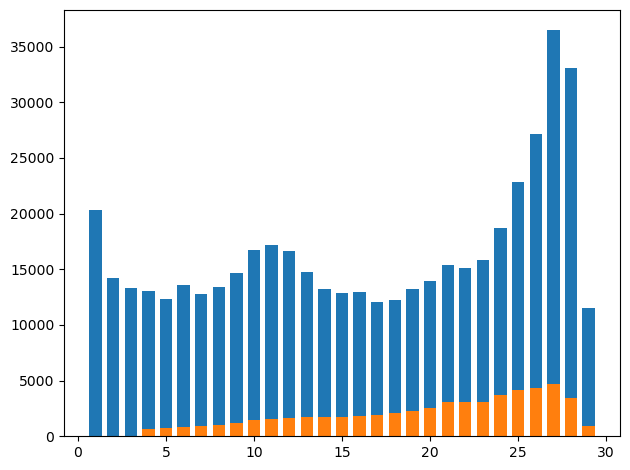

In [13]:
X = range(1,len(Closing_Odds['n_odds_draw'].unique())+1)
Y = Closing_Odds.groupby('n_odds_draw')['condition'].describe()["count"]
Y2 = [0,0,0]+list(Closing_Odds[Closing_Odds['condition']==True].groupby('n_odds_draw')['condition'].describe()["count"])

fig = pl.figure()
ax = fig.add_subplot(111)
ax.bar(x=X, height=Y, width=.7, align='center')
ax.bar(x=X, height=Y2, width=.7, align='center')


pl.tight_layout()
pl.show()

Let's try to estimate the "n_odds_draw" feature, by computing a rolling average sorting games by leagues.

In practice, each game would have a new feature that will entail the average odds available for draw in the last 5 games played in the same league. That way we can approximate the number of odds available to bet on draw for this game, which will then help us deterine the "condition" label with our model.

In [14]:
def get_n_odds_est(df):
    # Sort the DataFrame by league and match_id to ensure chronological order
    df = df.sort_values(by=['league', 'match_id'])
    
    # Group by league and compute the rolling average for 'n_odds_draw'
    rolling_means = (
        df.groupby('league')['n_odds_draw']
        .apply(lambda x: x.rolling(window=5, min_periods=1).mean())
    )
    
    df['n_odds_est'] = rolling_means.reset_index(drop=True)
    
    return df

# Apply the function to the dataframe
Closing_Odds = get_n_odds_est(Closing_Odds)
Closing_Odds.sort_values(by='match_id').reset_index(drop=True).head(10)

,match_id,country,league,match_date,year,home_team,home_score,away_team,away_score,result,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,max_odds_home_win,max_odds_draw,max_odds_away_win,top_bookie_home_win,top_bookie_draw,top_bookie_away_win,n_odds_home_win,n_odds_draw,n_odds_away_win,condition,n_odds_est
0,170088,England,England: Premier League,2005-01-01,2005,Liverpool,0,Chelsea,1,-1,2.9944,3.1944,2.2256,3.20,3.25,2.29,Paddy Power,Sportingbet,Expekt,9,9,9,False,19.0
1,170089,England,England: Premier League,2005-01-01,2005,Fulham,3,Crystal Palace,1,1,1.9456,3.2333,3.6722,2.04,3.30,4.15,Pinnacle Sports,bet-at-home,Expekt,9,9,9,False,14.0
2,170090,England,England: Premier League,2005-01-01,2005,Aston Villa,1,Blackburn,0,1,1.8522,3.2611,4.0144,2.00,3.40,4.50,Pinnacle Sports,Paddy Power,Sportingbet,9,9,9,False,16.0
3,170091,England,England: Premier League,2005-01-01,2005,Bolton,1,West Brom,1,0,1.6122,3.4133,5.4722,1.67,3.57,6.27,Coral,Pinnacle Sports,Pinnacle Sports,9,9,9,False,17.0
4,170092,England,England: Premier League,2005-01-01,2005,Charlton,1,Arsenal,3,-1,5.9878,3.4778,1.5567,7.00,3.60,1.62,Expekt,Paddy Power,bet365,9,9,9,False,17.6
5,170093,England,England: Premier League,2005-01-01,2005,Manchester City,2,Southampton,1,1,1.7000,3.3667,4.7344,1.73,3.50,5.00,bet365,Expekt,bet365,9,9,9,False,17.8
6,170094,England,England: Premier League,2005-01-01,2005,Newcastle Utd,2,Birmingham,1,1,1.8622,3.2500,3.9622,1.91,3.40,4.33,bet365,Sportingbet,bet365,9,9,9,False,20.0
7,170095,England,England: Premier League,2005-01-01,2005,Portsmouth,1,Norwich,1,0,1.6344,3.3933,5.2633,1.70,3.54,6.14,William Hill,Pinnacle Sports,Pinnacle Sports,9,9,9,False,20.0
8,170096,England,England: Premier League,2005-01-01,2005,Tottenham,5,Everton,2,1,2.2156,3.1722,3.0444,2.29,3.20,3.35,Expekt,bet365,Pinnacle Sports,9,9,9,False,19.8
9,170097,England,England: Premier League,2005-01-01,2005,Middlesbrough,0,Manchester United,2,-1,3.3611,3.2222,2.0489,3.75,3.25,2.10,bet365,Expekt,Coral,9,9,9,False,19.6


In [15]:
Closing_Odds.n_odds_est.isnull().sum()

0

In [16]:
# mznote: n_odds_draw has only nines, while n_odds_est shows 19, 14, 16... ?!?

In [17]:
Closing_Odds.loc[:, ["league", "match_id", "match_date", "n_odds_draw", "n_odds_est"]].sort_values(by=['league', 'match_id']).head()

,league,match_id,match_date,n_odds_draw,n_odds_est
71890,Africa: Africa Cup of Nations,316345,2008-01-29,19,21.0
71891,Africa: Africa Cup of Nations,316346,2008-01-29,9,21.2
71947,Africa: Africa Cup of Nations,316426,2008-01-30,20,19.8
71948,Africa: Africa Cup of Nations,316427,2008-01-30,20,20.2
71988,Africa: Africa Cup of Nations,316479,2008-01-31,20,23.6


In [18]:
Closing_Odds.loc[Closing_Odds.league=="England: Premier League", ["league", "match_id", "match_date", "n_odds_draw", "n_odds_est"]].sort_values(by=['league', 'match_id']).head()

,league,match_id,match_date,n_odds_draw,n_odds_est
0,England: Premier League,170088,2005-01-01,9,19.0
1,England: Premier League,170089,2005-01-01,9,14.0
2,England: Premier League,170090,2005-01-01,9,16.0
3,England: Premier League,170091,2005-01-01,9,17.0
4,England: Premier League,170092,2005-01-01,9,17.6


In [19]:
epl = Closing_Odds.loc[Closing_Odds.league=="England: Premier League", :].sort_values(by=['league', 'match_id'])
rolling_means = (
        epl.groupby('league')['n_odds_draw']
        .apply(lambda x: x.rolling(window=5, min_periods=1).mean())
    )

In [20]:
rolling_means[:10]

league                    
England: Premier League  0    9.0
                         1    9.0
                         2    9.0
                         3    9.0
                         4    9.0
                         5    9.0
                         6    9.0
                         7    9.0
                         8    9.0
                         9    9.0
Name: n_odds_draw, dtype: float64

In [21]:
epl['n_odds_est'] = rolling_means.reset_index(drop=True)
# epl['n_odds_est2'] = rolling_means
epl.loc[:, 'n_odds_est3'] = rolling_means.values
epl.head(10)

,match_id,country,league,match_date,year,home_team,home_score,away_team,away_score,result,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,max_odds_home_win,max_odds_draw,max_odds_away_win,top_bookie_home_win,top_bookie_draw,top_bookie_away_win,n_odds_home_win,n_odds_draw,n_odds_away_win,condition,n_odds_est,n_odds_est3
0,170088,England,England: Premier League,2005-01-01,2005,Liverpool,0,Chelsea,1,-1,2.9944,3.1944,2.2256,3.20,3.25,2.29,Paddy Power,Sportingbet,Expekt,9,9,9,False,9.0,9.0
1,170089,England,England: Premier League,2005-01-01,2005,Fulham,3,Crystal Palace,1,1,1.9456,3.2333,3.6722,2.04,3.30,4.15,Pinnacle Sports,bet-at-home,Expekt,9,9,9,False,9.0,9.0
2,170090,England,England: Premier League,2005-01-01,2005,Aston Villa,1,Blackburn,0,1,1.8522,3.2611,4.0144,2.00,3.40,4.50,Pinnacle Sports,Paddy Power,Sportingbet,9,9,9,False,9.0,9.0
3,170091,England,England: Premier League,2005-01-01,2005,Bolton,1,West Brom,1,0,1.6122,3.4133,5.4722,1.67,3.57,6.27,Coral,Pinnacle Sports,Pinnacle Sports,9,9,9,False,9.0,9.0
4,170092,England,England: Premier League,2005-01-01,2005,Charlton,1,Arsenal,3,-1,5.9878,3.4778,1.5567,7.00,3.60,1.62,Expekt,Paddy Power,bet365,9,9,9,False,9.0,9.0
5,170093,England,England: Premier League,2005-01-01,2005,Manchester City,2,Southampton,1,1,1.7000,3.3667,4.7344,1.73,3.50,5.00,bet365,Expekt,bet365,9,9,9,False,9.0,9.0
6,170094,England,England: Premier League,2005-01-01,2005,Newcastle Utd,2,Birmingham,1,1,1.8622,3.2500,3.9622,1.91,3.40,4.33,bet365,Sportingbet,bet365,9,9,9,False,9.0,9.0
7,170095,England,England: Premier League,2005-01-01,2005,Portsmouth,1,Norwich,1,0,1.6344,3.3933,5.2633,1.70,3.54,6.14,William Hill,Pinnacle Sports,Pinnacle Sports,9,9,9,False,9.0,9.0
8,170096,England,England: Premier League,2005-01-01,2005,Tottenham,5,Everton,2,1,2.2156,3.1722,3.0444,2.29,3.20,3.35,Expekt,bet365,Pinnacle Sports,9,9,9,False,9.0,9.0
9,170097,England,England: Premier League,2005-01-01,2005,Middlesbrough,0,Manchester United,2,-1,3.3611,3.2222,2.0489,3.75,3.25,2.10,bet365,Expekt,Coral,9,9,9,False,9.0,9.0


In [22]:
england = Closing_Odds.loc[Closing_Odds.country=="England", :].sort_values(by=['league', 'match_id'])
rolling_means = (
        epl.groupby('league')['n_odds_draw']
        .apply(lambda x: x.rolling(window=5, min_periods=1).mean())
    )
rolling_means[:10]

league                    
England: Premier League  0    9.0
                         1    9.0
                         2    9.0
                         3    9.0
                         4    9.0
                         5    9.0
                         6    9.0
                         7    9.0
                         8    9.0
                         9    9.0
Name: n_odds_draw, dtype: float64

In [23]:
rolling_means = (
        Closing_Odds.sort_values(by=['league', 'match_id']).groupby('league')['n_odds_draw']
        .apply(lambda x: x.rolling(window=5, min_periods=1).mean())
    )
rolling_means[:10]

league                              
Africa: Africa Cup of Nations  71890    19.0
                               71891    14.0
                               71947    16.0
                               71948    17.0
                               71988    17.6
                               71989    17.8
                               72195    20.0
                               72196    20.0
                               72311    19.8
                               72312    19.6
Name: n_odds_draw, dtype: float64

In [24]:
rolling_means.reset_index(drop=True).head(10)

0    19.0
1    14.0
2    16.0
3    17.0
4    17.6
5    17.8
6    20.0
7    20.0
8    19.8
9    19.6
Name: n_odds_draw, dtype: float64

In [25]:
def get_n_odds_est_fixed(df):
    df = df.sort_values(by=['league', 'match_id'])
    rolling_means = (
        df.groupby('league')['n_odds_draw']
        .apply(lambda x: x.rolling(window=5, min_periods=1).mean())
    )
    
    df.loc[:, 'n_odds_est_fixed'] = rolling_means.values
    
    return df
# 

In [26]:
Closing_Odds = get_n_odds_est_fixed(Closing_Odds)
Closing_Odds = Closing_Odds.sort_values(by='match_id').reset_index(drop=True)
Closing_Odds.loc[:, "n_odds_est_fixed_with_lag"] = Closing_Odds.groupby('league')['n_odds_draw'].transform(lambda x: x.rolling(5, 1, closed="left").mean())
Closing_Odds.sort_values(by='match_id').reset_index(drop=True).head(10)

,match_id,country,league,match_date,year,home_team,home_score,away_team,away_score,result,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,max_odds_home_win,max_odds_draw,max_odds_away_win,top_bookie_home_win,top_bookie_draw,top_bookie_away_win,n_odds_home_win,n_odds_draw,n_odds_away_win,condition,n_odds_est,n_odds_est_fixed,n_odds_est_fixed_with_lag
0,170088,England,England: Premier League,2005-01-01,2005,Liverpool,0,Chelsea,1,-1,2.9944,3.1944,2.2256,3.20,3.25,2.29,Paddy Power,Sportingbet,Expekt,9,9,9,False,19.0,9.0,NaN
1,170089,England,England: Premier League,2005-01-01,2005,Fulham,3,Crystal Palace,1,1,1.9456,3.2333,3.6722,2.04,3.30,4.15,Pinnacle Sports,bet-at-home,Expekt,9,9,9,False,14.0,9.0,9.0
2,170090,England,England: Premier League,2005-01-01,2005,Aston Villa,1,Blackburn,0,1,1.8522,3.2611,4.0144,2.00,3.40,4.50,Pinnacle Sports,Paddy Power,Sportingbet,9,9,9,False,16.0,9.0,9.0
3,170091,England,England: Premier League,2005-01-01,2005,Bolton,1,West Brom,1,0,1.6122,3.4133,5.4722,1.67,3.57,6.27,Coral,Pinnacle Sports,Pinnacle Sports,9,9,9,False,17.0,9.0,9.0
4,170092,England,England: Premier League,2005-01-01,2005,Charlton,1,Arsenal,3,-1,5.9878,3.4778,1.5567,7.00,3.60,1.62,Expekt,Paddy Power,bet365,9,9,9,False,17.6,9.0,9.0
5,170093,England,England: Premier League,2005-01-01,2005,Manchester City,2,Southampton,1,1,1.7000,3.3667,4.7344,1.73,3.50,5.00,bet365,Expekt,bet365,9,9,9,False,17.8,9.0,9.0
6,170094,England,England: Premier League,2005-01-01,2005,Newcastle Utd,2,Birmingham,1,1,1.8622,3.2500,3.9622,1.91,3.40,4.33,bet365,Sportingbet,bet365,9,9,9,False,20.0,9.0,9.0
7,170095,England,England: Premier League,2005-01-01,2005,Portsmouth,1,Norwich,1,0,1.6344,3.3933,5.2633,1.70,3.54,6.14,William Hill,Pinnacle Sports,Pinnacle Sports,9,9,9,False,20.0,9.0,9.0
8,170096,England,England: Premier League,2005-01-01,2005,Tottenham,5,Everton,2,1,2.2156,3.1722,3.0444,2.29,3.20,3.35,Expekt,bet365,Pinnacle Sports,9,9,9,False,19.8,9.0,9.0
9,170097,England,England: Premier League,2005-01-01,2005,Middlesbrough,0,Manchester United,2,-1,3.3611,3.2222,2.0489,3.75,3.25,2.10,bet365,Expekt,Coral,9,9,9,False,19.6,9.0,9.0


In [27]:
# mznote:
# Remi's code has an error: England matches (get first when sorting by match_id) get averages of African matches (get first when sorting by league & match_id)

How accurate is this estimator ? Can we actually approximate the number of odds available for a game based on the numbe rof odds available for the last 5 league's games ?

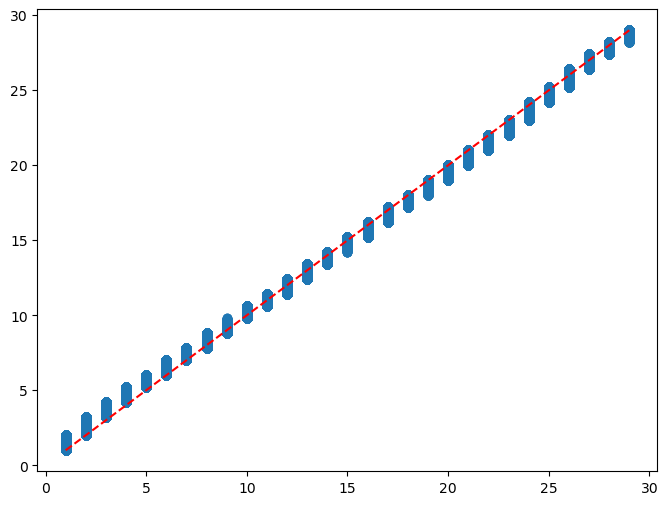

In [28]:
actual = sorted(Closing_Odds["n_odds_draw"])
predicted = sorted(Closing_Odds["n_odds_est"])

pl.figure(figsize=(8, 6))
pl.scatter(actual, predicted, alpha=0.7, label='Predicted vs Actual')

# Ideal line (y = x)
min_val = min(min(actual), min(predicted))
max_val = max(max(actual), max(predicted))
pl.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal (y=x)')
pl.show()

This graph show us that the estimations (blue ticks) are in the very proximity of the red dotted line (theory of what we should have gotten). Our estimator slightly overestimates low available odds and slightly understimates high available odds.

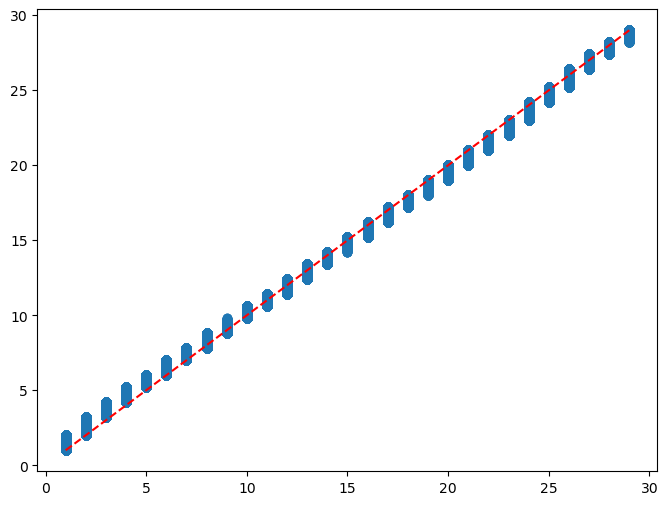

In [29]:
actual = sorted(Closing_Odds["n_odds_draw"])
predicted = sorted(Closing_Odds["n_odds_est_fixed"])

pl.figure(figsize=(8, 6))
pl.scatter(actual, predicted, alpha=0.7, label='Predicted vs Actual')

# Ideal line (y = x)
min_val = min(min(actual), min(predicted))
max_val = max(max(actual), max(predicted))
pl.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal (y=x)')
pl.show()

In [30]:
# mznote: build a model instead. Interpret it!
actual = Closing_Odds.loc[~Closing_Odds.n_odds_est_fixed_with_lag.isnull(), "n_odds_draw"]
predicted = Closing_Odds.loc[~Closing_Odds.n_odds_est_fixed_with_lag.isnull(), "n_odds_est_fixed_with_lag"]

import statsmodels.api as sm
mod = sm.OLS(actual, sm.add_constant(predicted))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            n_odds_draw   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 4.063e+06
Date:                Wed, 18 Jun 2025   Prob (F-statistic):               0.00
Time:                        15:09:19   Log-Likelihood:            -1.1826e+06
No. Observations:              478622   AIC:                         2.365e+06
Df Residuals:                  478620   BIC:                         2.365e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### #2 : Month of the year

Here is a theory : What if games played at the beginning of the season (aka end of the year) have more variance because teams have spent the last few months not playing. Bookmakers have to guess teams' form, they don't have access to recent games. Maybe it's a good way to find variance in odds distribution, let's see

In [31]:
Closing_Odds["month"] = Closing_Odds["match_date"].apply(lambda date: int(date[5:7]))

In [32]:
Closing_Odds.groupby("month").match_date.min()

month
1     2005-01-01
2     2005-02-01
3     2005-03-01
4     2005-04-01
5     2005-05-01
6     2005-06-01
7     2005-07-01
8     2005-08-01
9     2005-09-01
10    2005-10-01
11    2005-11-01
12    2005-12-01
Name: match_date, dtype: object

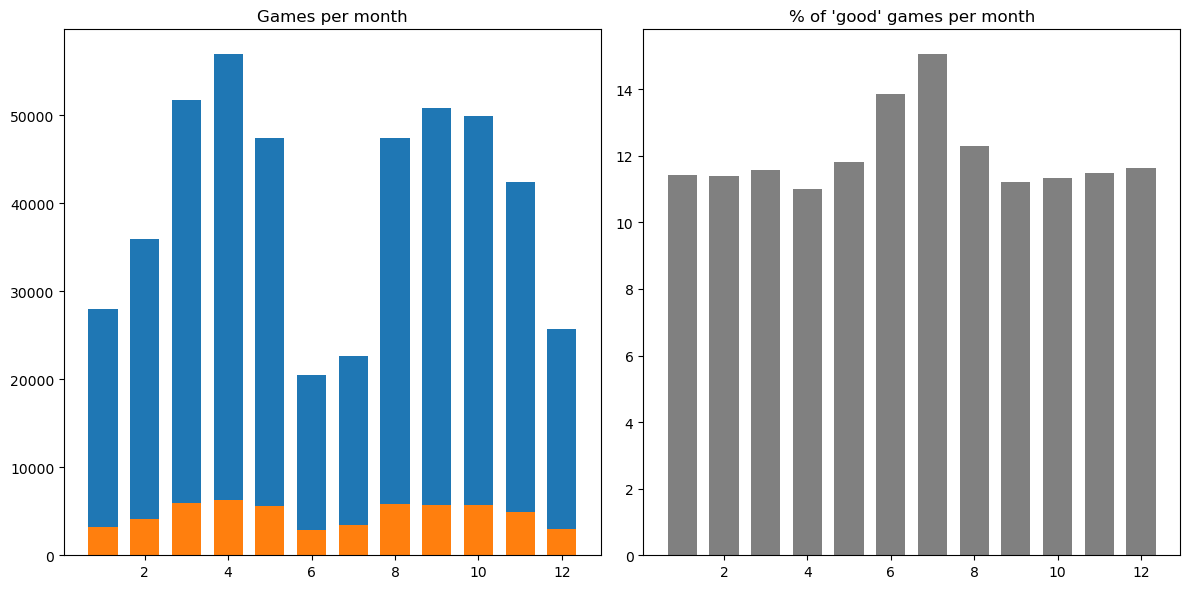

In [33]:
X = range(1, 13)
Y = Closing_Odds.groupby('month')['condition'].describe()["count"]
Y2 = Closing_Odds[Closing_Odds['condition']==True].groupby('month')['condition'].describe()["count"]

ratios = (Y2 / Y) * 100

fig, axes = pl.subplots(1, 2, figsize=(12, 6))

axes[0].bar(x=X, height=Y, width=0.7, align='center')
axes[0].bar(x=X, height=Y2, width=0.7, align='center')
axes[0].set_title("Games per month")


axes[1].bar(x=X, height=ratios, width=0.7, color='grey', align='center')
axes[1].set_title("% of 'good' games per month")


pl.tight_layout()
pl.show()

This graph represents the games by months of the year, from Jan to Dec. On the left, the blue bar is the total games played, and the orange bars are the ones with Condition equal to True. On the right, we have the ratio of good games to bet on / all games divided per months.

From a graph standpoint, the conclusion is hard to see. Games in July and August are rare, but have a higher % of true condition. It's hard to act on that information, because the lack of volume of games is detrimental to our use case, we shouldn't draw too much from this.

### #3: Condition estimator based on leagues

We want to predict our condition. Why wouldn't we make a feature trying to capture a league's chance of having a game fulfilling that condition ?

For each game, we calculate the ratio of past conditions for each game within the same league.

##### Example : 

At the start of the 2006 Premier League season, 180 games have been played :

In [34]:
Closing_Odds[
    (Closing_Odds['league']=="England: Premier League")&
    (Closing_Odds['year']<=2005)&
    (Closing_Odds['month']<=7)]

,match_id,country,league,match_date,year,home_team,home_score,away_team,away_score,result,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,max_odds_home_win,max_odds_draw,max_odds_away_win,top_bookie_home_win,top_bookie_draw,top_bookie_away_win,n_odds_home_win,n_odds_draw,n_odds_away_win,condition,n_odds_est,n_odds_est_fixed,n_odds_est_fixed_with_lag,month
0,170088,England,England: Premier League,2005-01-01,2005,Liverpool,0,Chelsea,1,-1,2.9944,3.1944,2.2256,3.20,3.25,2.29,Paddy Power,Sportingbet,Expekt,9,9,9,False,19.000000,9.0,NaN,1
1,170089,England,England: Premier League,2005-01-01,2005,Fulham,3,Crystal Palace,1,1,1.9456,3.2333,3.6722,2.04,3.30,4.15,Pinnacle Sports,bet-at-home,Expekt,9,9,9,False,14.000000,9.0,9.0,1
2,170090,England,England: Premier League,2005-01-01,2005,Aston Villa,1,Blackburn,0,1,1.8522,3.2611,4.0144,2.00,3.40,4.50,Pinnacle Sports,Paddy Power,Sportingbet,9,9,9,False,16.000000,9.0,9.0,1
3,170091,England,England: Premier League,2005-01-01,2005,Bolton,1,West Brom,1,0,1.6122,3.4133,5.4722,1.67,3.57,6.27,Coral,Pinnacle Sports,Pinnacle Sports,9,9,9,False,17.000000,9.0,9.0,1
4,170092,England,England: Premier League,2005-01-01,2005,Charlton,1,Arsenal,3,-1,5.9878,3.4778,1.5567,7.00,3.60,1.62,Expekt,Paddy Power,bet365,9,9,9,False,17.600000,9.0,9.0,1
5,170093,England,England: Premier League,2005-01-01,2005,Manchester City,2,Southampton,1,1,1.7000,3.3667,4.7344,1.73,3.50,5.00,bet365,Expekt,bet365,9,9,9,False,17.800000,9.0,9.0,1
6,170094,England,England: Premier League,2005-01-01,2005,Newcastle Utd,2,Birmingham,1,1,1.8622,3.2500,3.9622,1.91,3.40,4.33,bet365,Sportingbet,bet365,9,9,9,False,20.000000,9.0,9.0,1
7,170095,England,England: Premier League,2005-01-01,2005,Portsmouth,1,Norwich,1,0,1.6344,3.3933,5.2633,1.70,3.54,6.14,William Hill,Pinnacle Sports,Pinnacle Sports,9,9,9,False,20.000000,9.0,9.0,1
8,170096,England,England: Premier League,2005-01-01,2005,Tottenham,5,Everton,2,1,2.2156,3.1722,3.0444,2.29,3.20,3.35,Expekt,bet365,Pinnacle Sports,9,9,9,False,19.800000,9.0,9.0,1
9,170097,England,England: Premier League,2005-01-01,2005,Middlesbrough,0,Manchester United,2,-1,3.3611,3.2222,2.0489,3.75,3.25,2.10,bet365,Expekt,Coral,9,9,9,False,19.600000,9.0,9.0,1


Out of these 180 games, only 1 was advantageous to bet on. (The last one)

In [35]:
Closing_Odds[
    (Closing_Odds['league']=="England: Premier League")&
    (Closing_Odds['year']<=2005)&
    (Closing_Odds['month']<=7)]['condition'].sum()

1

So, the first PL game of the 2006-07 season will have a cond_est of 1/180, which is 0.0056

Now that the process is clear, let's dive into the code.

In [36]:
def calculate_league_condition_ratio(df: pd.DataFrame) -> pd.Series:
    
    condition_ratios = []  # Store calculated ratios
    league_history = {}  # History of conditions for each league

    for _, row in df.iterrows():
        league = row['league']
        condition = row['condition']

        # Initialize league history if not present
        if league not in league_history:
            league_history[league] = []

        # Retrieve previous conditions for the league
        previous_conditions = league_history[league]

        # Calculate the condition ratio
        condition_ratio = sum(previous_conditions) / len(previous_conditions) if previous_conditions else 0

        # Update the league history and ratios
        previous_conditions.append(condition)
        condition_ratios.append(condition_ratio)

    return pd.Series(condition_ratios, name='condition_ratio')

League_Cond_Ratio = calculate_league_condition_ratio(Closing_Odds)

In [37]:
League_Cond_Ratio

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
479435    0.138004
479436    0.137995
479437    0.137985
479438    0.137975
479439    0.137965
Name: condition_ratio, Length: 479440, dtype: float64

In [38]:
Closing_Odds['league_condition_est'] = League_Cond_Ratio

In [39]:
# Final Dataframe : 
Closing_Odds

,match_id,country,league,match_date,year,home_team,home_score,away_team,away_score,result,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,max_odds_home_win,max_odds_draw,max_odds_away_win,top_bookie_home_win,top_bookie_draw,top_bookie_away_win,n_odds_home_win,n_odds_draw,n_odds_away_win,condition,n_odds_est,n_odds_est_fixed,n_odds_est_fixed_with_lag,month,league_condition_est
0,170088,England,England: Premier League,2005-01-01,2005,Liverpool,0,Chelsea,1,-1,2.9944,3.1944,2.2256,3.20,3.25,2.29,Paddy Power,Sportingbet,Expekt,9,9,9,False,19.0,9.0,NaN,1,0.000000
1,170089,England,England: Premier League,2005-01-01,2005,Fulham,3,Crystal Palace,1,1,1.9456,3.2333,3.6722,2.04,3.30,4.15,Pinnacle Sports,bet-at-home,Expekt,9,9,9,False,14.0,9.0,9.0,1,0.000000
2,170090,England,England: Premier League,2005-01-01,2005,Aston Villa,1,Blackburn,0,1,1.8522,3.2611,4.0144,2.00,3.40,4.50,Pinnacle Sports,Paddy Power,Sportingbet,9,9,9,False,16.0,9.0,9.0,1,0.000000
3,170091,England,England: Premier League,2005-01-01,2005,Bolton,1,West Brom,1,0,1.6122,3.4133,5.4722,1.67,3.57,6.27,Coral,Pinnacle Sports,Pinnacle Sports,9,9,9,False,17.0,9.0,9.0,1,0.000000
4,170092,England,England: Premier League,2005-01-01,2005,Charlton,1,Arsenal,3,-1,5.9878,3.4778,1.5567,7.00,3.60,1.62,Expekt,Paddy Power,bet365,9,9,9,False,17.6,9.0,9.0,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479435,876806,World,World: Club Friendly,2015-06-30,2015,St. Gallen,1,Wacker Innsbruck,2,-1,1.6838,3.8846,3.9813,1.83,4.20,4.33,188BET,bet365,Ladbrokes,24,24,24,False,12.0,15.8,15.4,6,0.138004
479436,876807,World,World: Club Friendly,2015-06-30,2015,SW Harelbeke,1,Waregem,1,0,13.1165,7.8229,1.1053,19.00,9.00,1.13,BetVictor,bet365,Titanbet,17,17,17,False,11.8,16.2,15.8,6,0.137995
479437,876808,World,World: Club Friendly,2015-06-30,2015,Torhout,0,Club Brugge,5,-1,17.2256,12.6231,1.0288,22.00,15.00,1.05,BetVictor,Jetbull,BetVictor,16,16,16,False,11.6,14.0,16.2,6,0.137985
479438,876809,World,World: Club Friendly,2015-06-30,2015,Tournai,0,Mouscron Peruwelz,3,-1,15.7143,10.2857,1.0614,34.00,12.00,1.10,Sportingbet,Betclic,Paddy Power,7,7,7,False,11.2,15.0,14.0,6,0.137975


In [40]:
Closing_Odds.loc[:, ["league", "match_id", "match_date", "condition", "league_condition_est"]].head(10)

,league,match_id,match_date,condition,league_condition_est
0,England: Premier League,170088,2005-01-01,False,0.0
1,England: Premier League,170089,2005-01-01,False,0.0
2,England: Premier League,170090,2005-01-01,False,0.0
3,England: Premier League,170091,2005-01-01,False,0.0
4,England: Premier League,170092,2005-01-01,False,0.0
5,England: Premier League,170093,2005-01-01,False,0.0
6,England: Premier League,170094,2005-01-01,False,0.0
7,England: Premier League,170095,2005-01-01,False,0.0
8,England: Premier League,170096,2005-01-01,False,0.0
9,England: Premier League,170097,2005-01-01,False,0.0


In [41]:
Closing_Odds.loc[Closing_Odds.condition==True, ["league", "match_id", "match_date", "condition", "league_condition_est"]].head(10)

,league,match_id,match_date,condition,league_condition_est
24,England: League One,170112,2005-01-01,True,0.000000
84,England: Championship,170235,2005-01-03,True,0.000000
85,England: Championship,170236,2005-01-03,True,0.058824
148,Spain: Primera Division,170366,2005-01-05,True,0.000000
151,Italy: Serie A,170382,2005-01-06,True,0.000000
171,France: Coupe de France,170458,2005-01-07,True,0.000000
173,France: Coupe de France,170460,2005-01-07,True,0.333333
225,England: FA Cup,170580,2005-01-08,True,0.000000
277,England: FA Cup,170670,2005-01-09,True,0.033333
305,Portugal: Primeira Liga,170776,2005-01-09,True,0.000000


In [42]:
Closing_Odds.loc[Closing_Odds.league=="England: Championship", ["league", "match_id", "match_date", "condition", "league_condition_est"]].head(20)

,league,match_id,match_date,condition,league_condition_est
10,England: Championship,170098,2005-01-01,False,0.000000
11,England: Championship,170099,2005-01-01,False,0.000000
12,England: Championship,170100,2005-01-01,False,0.000000
13,England: Championship,170101,2005-01-01,False,0.000000
14,England: Championship,170102,2005-01-01,False,0.000000
15,England: Championship,170103,2005-01-01,False,0.000000
16,England: Championship,170104,2005-01-01,False,0.000000
17,England: Championship,170105,2005-01-01,False,0.000000
18,England: Championship,170106,2005-01-01,False,0.000000
19,England: Championship,170107,2005-01-01,False,0.000000


In [43]:
1/17

0.058823529411764705

In [44]:
Closing_Odds.loc[Closing_Odds.league=="Africa: Africa Cup of Nations", :].head(10)

,match_id,country,league,match_date,year,home_team,home_score,away_team,away_score,result,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,max_odds_home_win,max_odds_draw,max_odds_away_win,top_bookie_home_win,top_bookie_draw,top_bookie_away_win,n_odds_home_win,n_odds_draw,n_odds_away_win,condition,n_odds_est,n_odds_est_fixed,n_odds_est_fixed_with_lag,month,league_condition_est
71890,316345,Africa,Africa: Africa Cup of Nations,2008-01-29,2008,Ivory Coast,3,Mali,0,1,2.3847,1.9226,6.4137,2.54,2.00,8.30,Betsafe,bet-at-home,188BET,19,19,19,False,21.0,19.0,NaN,1,0.000000
71891,316346,Africa,Africa: Africa Cup of Nations,2008-01-29,2008,Nigeria,2,Benin,0,1,1.2078,5.4500,11.7822,1.25,6.00,15.00,bwin,Expekt,bet365,9,9,9,False,21.2,14.0,19.0,1,0.000000
71947,316426,Africa,Africa: Africa Cup of Nations,2008-01-30,2008,Cameroon,3,Sudan,0,1,1.1005,7.5075,17.4000,1.12,9.00,25.00,Betway,bet365,Unibet,20,20,20,False,19.8,16.0,14.0,1,0.000000
71948,316427,Africa,Africa: Africa Cup of Nations,2008-01-30,2008,Egypt,1,Zambia,1,0,1.3955,4.5025,15.3740,1.53,9.00,101.00,188BET,William Hill,Sportingbet,20,20,20,True,20.2,17.0,16.0,1,0.000000
71988,316479,Africa,Africa: Africa Cup of Nations,2008-01-31,2008,Senegal,1,South Africa,1,0,1.8190,3.4025,3.9870,1.90,3.70,4.55,bet-at-home,Pinnacle Sports,188BET,20,20,20,False,23.6,17.6,17.0,1,0.250000
71989,316480,Africa,Africa: Africa Cup of Nations,2008-01-31,2008,Tunisia,0,Angola,0,0,2.9115,1.7755,5.1730,3.20,1.90,5.80,bet-at-home,Betway,Unibet,20,20,20,False,23.4,17.8,17.6,1,0.200000
72195,316805,Africa,Africa: Africa Cup of Nations,2008-02-03,2008,Ghana,2,Nigeria,1,1,1.8670,3.1945,4.1575,2.00,3.25,4.95,bet-at-home,188BET,188BET,20,20,20,False,25.8,20.0,17.8,2,0.166667
72196,316806,Africa,Africa: Africa Cup of Nations,2008-02-03,2008,Ivory Coast,5,Guinea,0,1,1.3530,4.1080,9.1715,1.50,4.50,11.00,bet-at-home,bet365,bet365,20,20,20,True,25.6,20.0,20.0,2,0.142857
72311,317008,Africa,Africa: Africa Cup of Nations,2008-02-04,2008,Egypt,2,Angola,1,1,1.7653,3.3174,4.5558,2.00,3.45,5.25,bet-at-home,188BET,bet365,19,19,19,True,27.4,19.8,20.0,2,0.250000
72312,317009,Africa,Africa: Africa Cup of Nations,2008-02-04,2008,Tunisia,2,Cameroon,2,0,3.7411,3.1747,1.9895,4.33,3.30,2.20,Ladbrokes,188BET,bet-at-home,19,19,19,False,27.6,19.6,19.8,2,0.333333


In [45]:
# Final Dataframe from Remi's solution: 
Closing_Odds

,match_id,country,league,match_date,year,home_team,home_score,away_team,away_score,result,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,max_odds_home_win,max_odds_draw,max_odds_away_win,top_bookie_home_win,top_bookie_draw,top_bookie_away_win,n_odds_home_win,n_odds_draw,n_odds_away_win,condition,n_odds_est,n_odds_est_fixed,n_odds_est_fixed_with_lag,month,league_condition_est
0,170088,England,England: Premier League,2005-01-01,2005,Liverpool,0,Chelsea,1,-1,2.9944,3.1944,2.2256,3.20,3.25,2.29,Paddy Power,Sportingbet,Expekt,9,9,9,False,19.0,9.0,NaN,1,0.000000
1,170089,England,England: Premier League,2005-01-01,2005,Fulham,3,Crystal Palace,1,1,1.9456,3.2333,3.6722,2.04,3.30,4.15,Pinnacle Sports,bet-at-home,Expekt,9,9,9,False,14.0,9.0,9.0,1,0.000000
2,170090,England,England: Premier League,2005-01-01,2005,Aston Villa,1,Blackburn,0,1,1.8522,3.2611,4.0144,2.00,3.40,4.50,Pinnacle Sports,Paddy Power,Sportingbet,9,9,9,False,16.0,9.0,9.0,1,0.000000
3,170091,England,England: Premier League,2005-01-01,2005,Bolton,1,West Brom,1,0,1.6122,3.4133,5.4722,1.67,3.57,6.27,Coral,Pinnacle Sports,Pinnacle Sports,9,9,9,False,17.0,9.0,9.0,1,0.000000
4,170092,England,England: Premier League,2005-01-01,2005,Charlton,1,Arsenal,3,-1,5.9878,3.4778,1.5567,7.00,3.60,1.62,Expekt,Paddy Power,bet365,9,9,9,False,17.6,9.0,9.0,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479435,876806,World,World: Club Friendly,2015-06-30,2015,St. Gallen,1,Wacker Innsbruck,2,-1,1.6838,3.8846,3.9813,1.83,4.20,4.33,188BET,bet365,Ladbrokes,24,24,24,False,12.0,15.8,15.4,6,0.138004
479436,876807,World,World: Club Friendly,2015-06-30,2015,SW Harelbeke,1,Waregem,1,0,13.1165,7.8229,1.1053,19.00,9.00,1.13,BetVictor,bet365,Titanbet,17,17,17,False,11.8,16.2,15.8,6,0.137995
479437,876808,World,World: Club Friendly,2015-06-30,2015,Torhout,0,Club Brugge,5,-1,17.2256,12.6231,1.0288,22.00,15.00,1.05,BetVictor,Jetbull,BetVictor,16,16,16,False,11.6,14.0,16.2,6,0.137985
479438,876809,World,World: Club Friendly,2015-06-30,2015,Tournai,0,Mouscron Peruwelz,3,-1,15.7143,10.2857,1.0614,34.00,12.00,1.10,Sportingbet,Betclic,Paddy Power,7,7,7,False,11.2,15.0,14.0,6,0.137975


## III - Model Choice

Our goal now is to build an AI model to predict the condition label for our games, to follow our betting strategy optimally.

We also only take into account features we can use both for training AND testing. Meaning we simply discard odds data, results, goal difference ...

It's a first approximation, we shall see whether or not to improve the model based on preliminary results, and find ways to include more data, or new ways of slicing data to mitigate issues and biases.

Also, and although it hurts because they are very correlated with our label, we cannot include year and match_id in our model, as our use case revolves around the fact that we shouldn't be able to 

In [47]:
training_columns = (["month","league_condition_est","n_odds_est"])

In [ ]:
# mznote: original solution

AUC-ROC: 0.5315


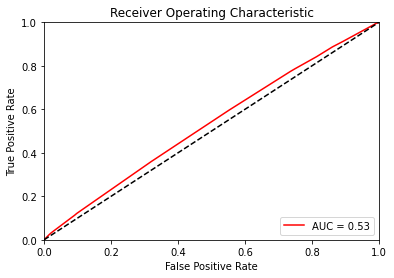

              precision    recall  f1-score   support

       False       0.89      0.51      0.65    126902
        True       0.13      0.53      0.20     16930

    accuracy                           0.51    143832
   macro avg       0.51      0.52      0.43    143832
weighted avg       0.80      0.51      0.60    143832

[0.26972529 0.52244355 0.20783115]


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, classification_report
import sklearn.metrics as metrics


# Split our data into features and labels
X = Closing_Odds[training_columns]
y = Closing_Odds['condition']

# Split into train/test sets with 20% of games as testing and 80% as training

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Let's take a classic Decision Tree for now. Explainable, handles classs imbalance and intuitive 
model = DecisionTreeClassifier(random_state = 77, class_weight='balanced', max_depth=4)

# Train the model
model.fit(X_train, y_train)

# Predict probabilities for AUC-ROC
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc:.4f}')

pl.title('Receiver Operating Characteristic')
pl.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
pl.legend(loc = 'lower right')
pl.plot([0, 1], [0, 1],color = 'black',linestyle='--')
pl.xlim([0, 1])
pl.ylim([0, 1])
pl.ylabel('True Positive Rate')
pl.xlabel('False Positive Rate')
pl.show()

# Also, print a classification report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(model.feature_importances_)

#### This model has an AUC of .535, and it correctly retrieves 64% of the games fulfilling the paper's condition. This is a great first step, and a gives us hope that with a better data pipeline, we can leverage more data (odds, mainly) into the training/testing processes to bolster these results in the future.

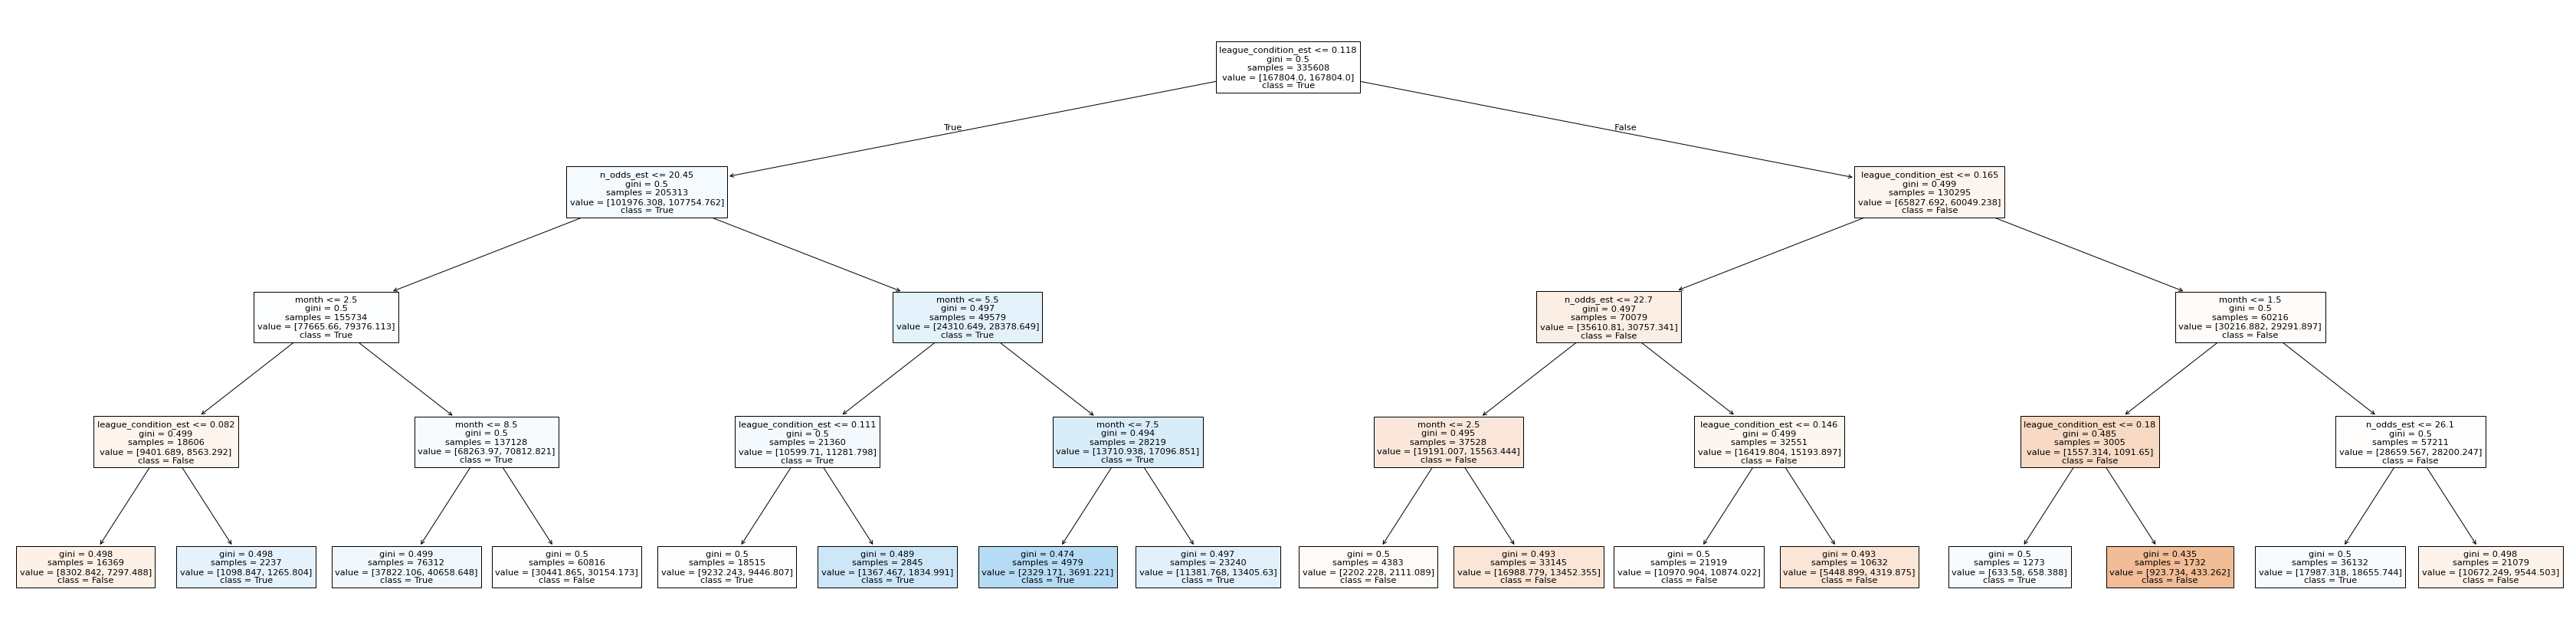

In [21]:
fig = pl.figure(figsize=(60,15))
_ = tree.plot_tree(model,feature_names=X.columns,class_names=['False','True'], filled=True)

In [ ]:
# mznote:
# interpret [0.26972529 0.52244355 0.20783115] feature_importances_
# interpret gini in tree plot
# trin/test split: random, while "league_condition_est","n_odds_est" are sorted in match_id (time) - which split would be more appropriate?

In [49]:
# mznote: below are results from dataset with fixed indexing

In [50]:
Closing_Odds.columns

Index(['match_id', 'country', 'league', 'match_date', 'year', 'home_team', 'home_score', 'away_team', 'away_score', 'result', 'avg_odds_home_win', 'avg_odds_draw', 'avg_odds_away_win', 'max_odds_home_win', 'max_odds_draw', 'max_odds_away_win', 'top_bookie_home_win', 'top_bookie_draw', 'top_bookie_away_win', 'n_odds_home_win', 'n_odds_draw', 'n_odds_away_win', 'condition', 'n_odds_est', 'n_odds_est_fixed', 'n_odds_est_fixed_with_lag', 'month', 'league_condition_est'], dtype='object')

In [51]:
training_columns = (["month","league_condition_est","n_odds_est_fixed"])

AUC-ROC: 0.6737


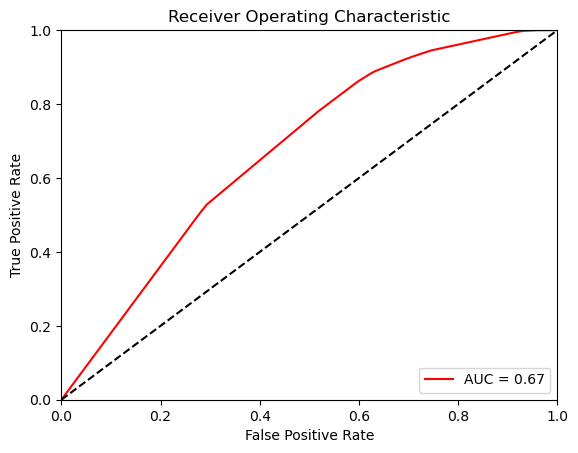

              precision    recall  f1-score   support

       False       0.94      0.48      0.64    126902
        True       0.17      0.78      0.28     16930

    accuracy                           0.52    143832
   macro avg       0.56      0.63      0.46    143832
weighted avg       0.85      0.52      0.59    143832

[0.         0.78186645 0.21813355]


In [52]:
# Split our data into features and labels
X = Closing_Odds[training_columns]
y = Closing_Odds['condition']

# Split into train/test sets with 20% of games as testing and 80% as training

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Let's take a classic Decision Tree for now. Explainable, handles classs imbalance and intuitive 
model = DecisionTreeClassifier(random_state = 77, class_weight='balanced', max_depth=4)

# Train the model
model.fit(X_train, y_train)

# Predict probabilities for AUC-ROC
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc:.4f}')

pl.title('Receiver Operating Characteristic')
pl.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
pl.legend(loc = 'lower right')
pl.plot([0, 1], [0, 1],color = 'black',linestyle='--')
pl.xlim([0, 1])
pl.ylim([0, 1])
pl.ylabel('True Positive Rate')
pl.xlabel('False Positive Rate')
pl.show()

# Also, print a classification report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(model.feature_importances_)

In [53]:
# mznote: what is wrong with this solution? lag

AUC-ROC: 0.6758


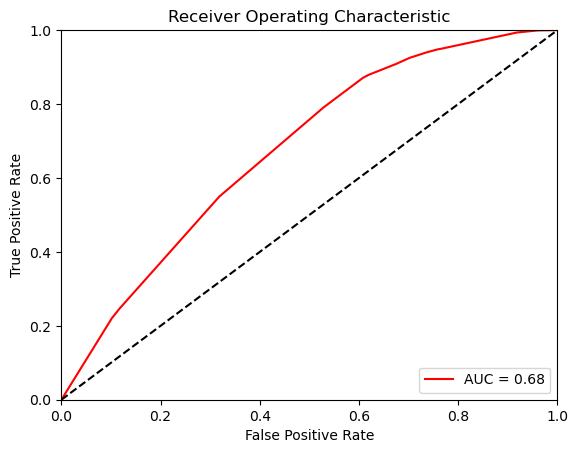

              precision    recall  f1-score   support

       False       0.94      0.47      0.63    126902
        True       0.17      0.79      0.27     16930

    accuracy                           0.51    143832
   macro avg       0.56      0.63      0.45    143832
weighted avg       0.85      0.51      0.59    143832

[0.         0.82903107 0.17096893]


In [80]:
training_columns = (["month","league_condition_est","n_odds_est_fixed_with_lag"])
# Split our data into features and labels
X = Closing_Odds[training_columns]
y = Closing_Odds['condition']

# Split into train/test sets with 20% of games as testing and 80% as training

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Let's take a classic Decision Tree for now. Explainable, handles classs imbalance and intuitive 
model = DecisionTreeClassifier(random_state = 77, class_weight='balanced', max_depth=4)

# Train the model
model.fit(X_train, y_train)

# Predict probabilities for AUC-ROC
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc:.4f}')

pl.title('Receiver Operating Characteristic')
pl.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
pl.legend(loc = 'lower right')
pl.plot([0, 1], [0, 1],color = 'black',linestyle='--')
pl.xlim([0, 1])
pl.ylim([0, 1])
pl.ylabel('True Positive Rate')
pl.xlabel('False Positive Rate')
pl.show()

# Also, print a classification report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(model.feature_importances_)

In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[59813, 67089],
       [ 3538, 13392]])

In [83]:
# precision = TP/(TP+FP)
# recall = TP/P
precision = 59813/(59813+3538)
recall = 59813/(59813+67089)
print(precision, recall)

0.9441524206405582 0.47133220910623946


In [ ]:
# mznote: ideas for features: check volatility in odds for past matches of a home_team win/away_team win/draw across home_team/away_team/league; check how often condition was satisfied in previous matches in home_team/away_team/league level

## Conclusion :



This time, the model is even better, with better features, more explainability, and less complexity.

It might be beneficial to try other types of models, like XGBoost for example. I didn't want to take that route based on what you advised.

I did my best to follow your feedback, and still stay true to the original paper's vision, which is to stay away from the idea of trying to predict games' results and instead focus solely on bookmakers' odd distribution.

I hope you like it better this time.

#### Below are features AI hinted at, or features I tried to include and ultimately didn't keep.

What Chatbots hinted at. I don't see anything that doesn't fall into 1 of 3 categories :
- I tried it
- It clashes with the idea of the paper, which is to stay as far as we can from trying to predict games' results
- It can't be done with our data

Also, most of them would fall in the "previous solution was too complicated, simplify" category. I would've maybe liked to try some, but I feared it would've meant going directly against what you advised me to do. 

Let me know if I missed something, I will listen carefully to your feedback.

### Team Performance Features
##### Historical Win/Loss/Draw Rates:

Home Team Win Rate

Away Team Win Rate

Home Team Draw Rate

Away Team Draw Rate


##### Goals Scored and Conceded:

Average Goals Scored (Home)

Average Goals Conceded (Home)

Average Goals Scored (Away)

Average Goals Conceded (Away)

### Recent Form:

Home Team Recent Form

Away Team Recent Form

### Head-to-Head Features
##### Head-to-Head Win/Loss/Draw Rates:

Home Team Win Rate vs. Away Team

Away Team Win Rate vs. Home Team

Draw Rate

##### Head-to-Head Goals Scored and Conceded:

Average Goals Scored by Home Team vs. Away Team 

Average Goals Conceded by Home Team vs. Away Team

Average Goals Scored by Away Team vs. Home Team

Average Goals Conceded by Away Team vs. Home Team



### League-Specific Features
##### League Performance:

Home Team League Position

Away Team League Position

League Average Goals

##### League Strength:

League Strength Indicator: A metric indicating the overall strength of the league (e.g., average goals per match, win/loss rates).


### Time-Based Features
##### Time Since Last Match:

Days Since Last Match (Home)

Days Since Last Match (Away)

##### Match Timing:

Day of the Week

Month



### Team-Specific Features
##### Home/Away Performance:

Home Team Home Performance

Away Team Away Performance


##### Team Strength Indicators:

Home Team Strength : composite metric indicating the overall strength of the home team (e.g., based on historical performance, goals scored, etc.)
Away Team Strength


### Features I tried to implement, but didn't keep in the end. Either because of how little variance they explained, or because I felt it was already too complicated. I know it's still steep, but I really tried to simplify as much as I could.

### #4 : Team recent form through winrate difference

Theory : Some games are expected to be close, some aren't. This has a tremendous impact on odds distribution. On one hand, the favorite will have odds around 1 and the other around 3, 10, sometimes 50+. On the other hand, if both teams get assigned odds around 2 or 3, indicating a close game, there might be very little leeway for our strategy to work, because of the little variance allowed to us.

What if we could spot games between unbalanced teams, and check if our condition applies to those more or not ?
For that, we will compute teams' last 5 games' results, translate it into a score (+3 for a win, -3 for a loss). And then compute the difference between the Home team score and the Away team score. This will give us a feature, ranging from -30 to +30, with -30s being unbalanced game in favor of the away team, +30s for the home team, and ~0s for close games. 

Let's see where it leads us !

In [ ]:
def away_team_last_5_wr(df):

    last_5_wr = []

    # Dictionary to track the last 5 games of each team
    team_history = {}

    for _, row in df.iterrows():
        away_team = row['away_team']
        result = row['result']

        # Initialize team history if not present
        if away_team not in team_history:
            team_history[away_team] = []

        # Calculate score for the last 5 games
        recent_results = team_history[away_team]
        if len(recent_results) > 0:
            wr = 3*sum(recent_results)
            
        else:
            wr = 0
        last_5_wr.append(wr)

        if len(recent_results) == 5:
            recent_results.pop(0)  
        recent_results.append(result)

    return pd.Series(last_5_wr, name='away_last_5_wr')

Last_5_A_WR = away_team_last_5_wr(Closing_Odds)

In [ ]:
def home_team_last_5_wr(df):

    last_5_wr = []

    # Dictionary to track the last 5 games of each home team
    team_history = {}

    for _, row in df.iterrows():
        home_team = row['home_team']
        result = row['result']

        # Initialize team history if not present
        if home_team not in team_history:
            team_history[home_team] = []

        # Calculate score for the last 5 games
        recent_results = team_history[home_team]
        if len(recent_results) > 0:
            wr = 3*sum(recent_results)

            
        else:
            wr = 0
        last_5_wr.append(wr)

        # Update the team's history with the current game result
        if len(recent_results) == 5:
            recent_results.pop(0)  # Remove the oldest result
        recent_results.append(result)

    return pd.Series(last_5_wr, name='home_last_5_wr')

Last_5_H_WR = home_team_last_5_wr(Closing_Odds)

In [ ]:
Score_Feature = Last_5_H_WR-Last_5_A_WR
Score_Feature

In [ ]:
Closing_Odds['score_feature']=Score_Feature

In [ ]:
X = list(sorted(Closing_Odds['score_feature'].unique()))
Y = Closing_Odds.groupby('score_feature')['condition'].describe()["count"]
Y2 = Closing_Odds[Closing_Odds['condition']==True].groupby('score_feature')['condition'].describe()["count"]

ratios = (Y2 / Y) * 100

fig, axes = pl.subplots(1, 2, figsize=(12, 6))

axes[0].bar(x=X, height=Y, width=2, align='center')
axes[0].bar(x=X, height=Y2, width=1.5, align='center')
axes[0].set_title("Games per difference in recent form (Score)")


axes[1].bar(x=X, height=ratios, width=2, color='grey', align='center')
axes[1].set_title("% of 'good' games per Score difference")


pl.tight_layout()
pl.show()

Unfortunately, our condition isn't tied at all to our metric. Our hypothesis is rejected.

### #5 : Teams' last 5 performances (odds estimators)

In [ ]:
# mznote: this looks interesting - reproducing to get outputs

Most of our betting strategy revolves around the available odds. Unfortunately, we can't access future games' odds, because of how time works. 

Instead, we could try to estimate bookmakers' future odds based on what they did recently for each Home/Away teams.

Let's do an example first. Here are Marseille's last 5 recorded away games, with their opponent and the associated odds for their win.
Based on this data, what if we estimate their last away game average odd to be the average of the 5 previous ones ? Would we be off the mark ? Way off ? Or somewhat close ? Let's do it by hand this time. 

In [57]:
Closing_Odds = Closing_Odds.sort_values(by=['match_id'])

In [58]:
Closing_Odds[Closing_Odds["away_team"]=="Marseille"][["home_team","away_team","match_date","avg_odds_away_win"]].tail(6)

,home_team,away_team,match_date,avg_odds_away_win
459338,Lens,Marseille,2015-03-22,1.6348
460190,Nimes,Marseille,2015-03-27,1.9000
464287,Bordeaux,Marseille,2015-04-12,2.6990
465248,Nantes,Marseille,2015-04-17,1.9169
469083,Metz,Marseille,2015-05-01,1.7328
472779,Lille,Marseille,2015-05-16,2.1545


In [60]:
Closing_Odds[Closing_Odds["away_team"]=="Marseille"][["home_team","away_team","match_date","avg_odds_away_win"]].tail(6)[:5]

,home_team,away_team,match_date,avg_odds_away_win
459338,Lens,Marseille,2015-03-22,1.6348
460190,Nimes,Marseille,2015-03-27,1.9000
464287,Bordeaux,Marseille,2015-04-12,2.6990
465248,Nantes,Marseille,2015-04-17,1.9169
469083,Metz,Marseille,2015-05-01,1.7328


In [59]:
Closing_Odds[Closing_Odds["away_team"]=="Marseille"][["home_team","away_team","match_date","avg_odds_away_win"]].tail(6)[:5]['avg_odds_away_win'].mean()

1.9767

Not too bad. It also relies heavily on the opponent, as one could've guessed. Maybe we will have to include that in the future.

In [61]:
def away_team_last_5_odds(df):

    last_5_odds = []

    # Dictionary to track the last 5 games of each team (away only)
    team_history = {}

    for _, row in df.iterrows():
        away_team = row['away_team']
        odd = row['avg_odds_away_win']

        # Initialize team history if not present
        if away_team not in team_history:
            team_history[away_team] = []

        # Calculate win rate for the last 5 games
        recent_odds = team_history[away_team]

        if len(recent_odds) > 0:
            avg_odds = sum(recent_odds)/len(recent_odds)
            
        else:
            avg_odds = 0
        last_5_odds.append(avg_odds)

        # Update the team's history with the current game result
        if len(recent_odds) == 5:
            recent_odds.pop(0)  # Remove the oldest result
        recent_odds.append(odd)

    return pd.Series(last_5_odds, name='away_last_5_odds')

Last_5_A_Odds = away_team_last_5_odds(Closing_Odds)

In [62]:
Closing_Odds['avg_away_win_est'] = Last_5_A_Odds
Closing_Odds['avg_away_win_est'].describe()

count    479440.000000
mean          3.870288
std           1.933624
min           0.000000
25%           2.744600
50%           3.536780
75%           4.581405
max         101.000000
Name: avg_away_win_est, dtype: float64

In [64]:
Closing_Odds['avg_away_win_est_mw5'] = Closing_Odds.sort_values(["match_date", "match_id"]).groupby("away_team")["avg_odds_away_win"].transform(lambda x: x.rolling(5, 1, closed="left").mean())

In [65]:
Closing_Odds.loc[Closing_Odds.away_team=="Marseille", ["home_team","away_team","match_date","avg_odds_away_win", "avg_away_win_est", "avg_away_win_est_mw5"]]

,home_team,away_team,match_date,avg_odds_away_win,avg_away_win_est,avg_away_win_est_mw5
340,Lille,Marseille,2005-01-11,3.4222,0.00000,NaN
689,Metz,Marseille,2005-01-22,2.5200,3.42220,3.42220
986,Toulouse,Marseille,2005-01-29,2.7950,2.97110,2.97110
1923,Bastia,Marseille,2005-02-19,2.2770,2.91240,2.91240
2768,St Etienne,Marseille,2005-03-06,2.8800,2.75355,2.75355
3699,Monaco,Marseille,2005-03-20,3.6664,2.77884,2.77884
4800,Strasbourg,Marseille,2005-04-09,2.8260,2.82768,2.82768
5923,Nantes,Marseille,2005-04-23,2.9170,2.88888,2.88888
7368,Auxerre,Marseille,2005-05-14,3.2044,2.91328,2.91328
8206,Bordeaux,Marseille,2005-05-28,3.1310,3.09876,3.09876


In [66]:
def home_team_last_5_odds(df):

    last_5_odds = []

    # Dictionary to track the last 5 games of each team (home only)
    team_history = {}

    for _, row in df.iterrows():
        home_team = row['home_team']
        odd = row['avg_odds_home_win']

        # Initialize team history if not present
        if home_team not in team_history:
            team_history[home_team] = []

        # Calculate win rate for the last 5 games
        recent_odds = team_history[home_team]

        if len(recent_odds) > 0:
            avg_odds = sum(recent_odds)/len(recent_odds)
            
        else:
            avg_odds = 0
        last_5_odds.append(avg_odds)

        # Update the team's history with the current game result
        if len(recent_odds) == 5:
            recent_odds.pop(0)  # Remove the oldest result
        recent_odds.append(odd)

    return pd.Series(last_5_odds, name='home_last_5_odds')

Last_5_H_Odds = home_team_last_5_odds(Closing_Odds)

In [67]:
Closing_Odds['avg_home_win_est'] = Last_5_H_Odds
Closing_Odds['avg_home_win_est'].describe()

count    479440.000000
mean          2.429491
std           1.290784
min           0.000000
25%           1.838100
50%           2.196340
75%           2.693725
max          61.000000
Name: avg_home_win_est, dtype: float64

In [68]:
Closing_Odds['avg_home_win_est_mw5'] = Closing_Odds.sort_values(["match_date", "match_id"]).groupby("home_team")["avg_odds_home_win"].transform(lambda x: x.rolling(5, 1, closed="left").mean())

In [69]:
Closing_Odds.loc[Closing_Odds.home_team=="Marseille", ["home_team","away_team","match_date","avg_odds_home_win", "avg_home_win_est", "avg_home_win_est_mw5"]]

,home_team,away_team,match_date,avg_odds_home_win,avg_home_win_est,avg_home_win_est_mw5
231,Marseille,Angers,2005-01-08,1.1988,0.00000,NaN
505,Marseille,Nice,2005-01-16,1.6930,1.19880,1.19880
861,Marseille,Sochaux,2005-01-25,1.6610,1.44590,1.44590
1311,Marseille,Rennes,2005-02-05,1.5510,1.51760,1.51760
2406,Marseille,Istres,2005-02-27,1.3620,1.52595,1.52595
3044,Marseille,Lens,2005-03-12,1.7320,1.49316,1.49316
4491,Marseille,Paris SG,2005-04-03,1.7818,1.59980,1.59980
5320,Marseille,AC Ajaccio,2005-04-16,1.4809,1.61756,1.61756
6918,Marseille,Caen,2005-05-07,1.4300,1.58154,1.58154
7835,Marseille,Lyon,2005-05-21,2.2913,1.55734,1.55734


AUC-ROC: 0.5123


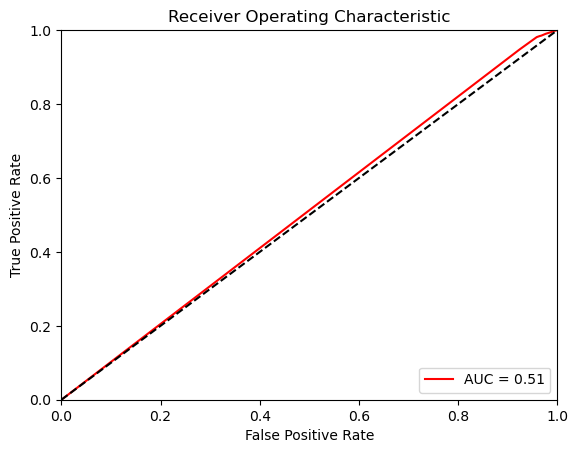

              precision    recall  f1-score   support

       False       0.92      0.08      0.14    126902
        True       0.12      0.95      0.21     16930

    accuracy                           0.18    143832
   macro avg       0.52      0.51      0.18    143832
weighted avg       0.82      0.18      0.15    143832

[0.66544653 0.33455347]


In [75]:
X = Closing_Odds.loc[:, ["avg_home_win_est", "avg_away_win_est"]]
y = Closing_Odds['condition']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Let's take a classic Decision Tree for now. Explainable, handles classs imbalance and intuitive 
model = DecisionTreeClassifier(random_state = 77, class_weight='balanced', max_depth=4)

# Train the model
model.fit(X_train, y_train)

# Predict probabilities for AUC-ROC
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc:.4f}')

pl.title('Receiver Operating Characteristic')
pl.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
pl.legend(loc = 'lower right')
pl.plot([0, 1], [0, 1],color = 'black',linestyle='--')
pl.xlim([0, 1])
pl.ylim([0, 1])
pl.ylabel('True Positive Rate')
pl.xlabel('False Positive Rate')
pl.show()

# Also, print a classification report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(model.feature_importances_)

### #6: Recent form (Goal Average)

If winrate aren't cutting it, maybe goal average will. To test this new hypothesis, we'll add a feature that contains the difference in goals scored-conceded for both teams, to assess who's going into this new game better prepared.

The idea is similar to the previous one : if a team scores more and concedes less, they are probably favorites, and therefore it has an impact on the odds that will be distributed.

In [ ]:
def home_team_last_5_ga(df):

    last_5_ga = []

    # Dictionary to track the last 5 games of each home team
    team_history = {}

    for _, row in df.iterrows():
        home_team = row['home_team']
        result = row['home_score']-row['away_score']

        # Initialize team history if not present
        if home_team not in team_history:
            team_history[home_team] = []

        # Calculate win rate for the last 5 games
        recent_results = team_history[home_team]
        if len(recent_results) > 0:
            ga = sum(recent_results)

            
        else:
            ga = 0
        last_5_ga.append(ga)

        # Update the team's history with the current game result
        if len(recent_results) == 5:
            recent_results.pop(0)  # Remove the oldest result
        recent_results.append(result)

    return pd.Series(last_5_ga, name='home_last_5_ga')

Last_5_H_GA = home_team_last_5_ga(Closing_Odds)

In [ ]:
def away_team_last_5_ga(df):

    last_5_ga = []

    # Dictionary to track the last 5 games of each home team
    team_history = {}

    for _, row in df.iterrows():
        away_team = row['away_team']
        result = row['away_score']-row['home_score']

        # Initialize team history if not present
        if away_team not in team_history:
            team_history[away_team] = []

        # Calculate win rate for the last 5 games
        recent_results = team_history[away_team]
        if len(recent_results) > 0:
            ga = sum(recent_results)

            
        else:
            ga = 0
        last_5_ga.append(ga)

        # Update the team's history with the current game result
        if len(recent_results) == 5:
            recent_results.pop(0)  # Remove the oldest result
        recent_results.append(result)

    return pd.Series(last_5_ga, name='away_last_5_ga')

Last_5_A_GA = away_team_last_5_ga(Closing_Odds)

In [ ]:
Closing_Odds['Home_GA'] = Last_5_H_GA
Closing_Odds['Away_GA'] = Last_5_A_GA

In [ ]:
X = list(sorted(Closing_Odds['Home_GA'].unique()))
Y = Closing_Odds.groupby('Home_GA')['condition'].describe()["count"]
Y2 = Closing_Odds[Closing_Odds['condition']==True].groupby('Home_GA')['condition'].describe()["count"]

ratios = (Y2 / Y) * 100

fig, axes = pl.subplots(1, 2, figsize=(12, 6))

axes[0].bar(x=X, height=Y, width=.7, align='center')
axes[0].set_title("N° games per difference in GA for Home team")


axes[1].bar(x=X, height=ratios, width=.7, color='grey', align='center')
axes[1].set_title("% of 'good' games per GA difference")


pl.tight_layout()
pl.show()

In [ ]:
X = list(sorted(Closing_Odds['Away_GA'].unique()))
Y = Closing_Odds.groupby('Away_GA')['condition'].describe()["count"]
Y2 = Closing_Odds[Closing_Odds['condition']==True].groupby('Away_GA')['condition'].describe()["count"]

ratios = (Y2 / Y) * 100

fig, axes = pl.subplots(1, 2, figsize=(12, 6))

axes[0].bar(x=X, height=Y, width=.7, align='center')
axes[0].set_title("N° games per difference in GA for Away team")


axes[1].bar(x=X, height=ratios, width=.7, color='grey', align='center')
axes[1].set_title("% of 'good' games per GA difference")


pl.tight_layout()
pl.show()

This time, our metrics lead us to the expected conclusion. However, the fact that games with a |GA_difference| higher than 10 are so rare that this will never hold any weight in our model. It would've been great though.